# Credit Card Customer Segementation Using K-means

## Import libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
df = pd.read_csv('customer_segmentation_credit.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_Id               2000 non-null   object 
 1   age                       2000 non-null   float64
 2   gender                    2000 non-null   object 
 3   dependent_count           2000 non-null   int64  
 4   education_level           2000 non-null   object 
 5   marital_status            2000 non-null   object 
 6   estimated_income          2000 non-null   float64
 7   months_on_book            2000 non-null   float64
 8   total_relationship_count  2000 non-null   int64  
 9   months_inactive_12_mon    2000 non-null   int64  
 10  credit_limit              2000 non-null   float64
 11  total_trans_amount        2000 non-null   float64
 12  total_trans_count         2000 non-null   float64
 13  avg_utilization_ratio     2000 non-null   float64
dtypes: float

## value count analysis of categorical feature

In [3]:
df['gender'].value_counts()

gender
Male      1028
Female     972
Name: count, dtype: int64

In [4]:
df['marital_status'].value_counts()

marital_status
Single      716
Divorced    657
Married     627
Name: count, dtype: int64

In [5]:
df['education_level'].value_counts()

education_level
High School      556
Doctorate        502
Graduate         471
Post-Graduate    471
Name: count, dtype: int64

## Statistical analysis of numerical feature

In [6]:
df.describe()

,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45.451000,2.075500,52912.375155,68.123500,3.506000,3.04900,2818.493995,14700.578740,73.365000,0.617904
std,9.858154,1.404559,45584.085021,17.712089,1.715061,1.98836,2289.538206,3273.912212,17.218798,0.203154
min,18.000000,0.000000,20000.000000,12.000000,1.000000,0.00000,1000.000000,4980.440000,18.000000,0.057000
25%,39.000000,1.000000,20000.000000,56.000000,2.000000,1.00000,1000.000000,12290.350000,61.000000,0.485750
50%,45.000000,2.000000,33224.340000,68.000000,4.000000,3.00000,2022.320000,14803.570000,74.000000,0.665500
75%,52.000000,3.000000,70295.010000,80.000000,5.000000,5.00000,3606.952500,17052.065000,85.000000,0.800000
max,75.000000,4.000000,250000.000000,125.000000,6.000000,6.00000,13955.430000,23480.450000,121.000000,0.883000


## Visualization of dataframe

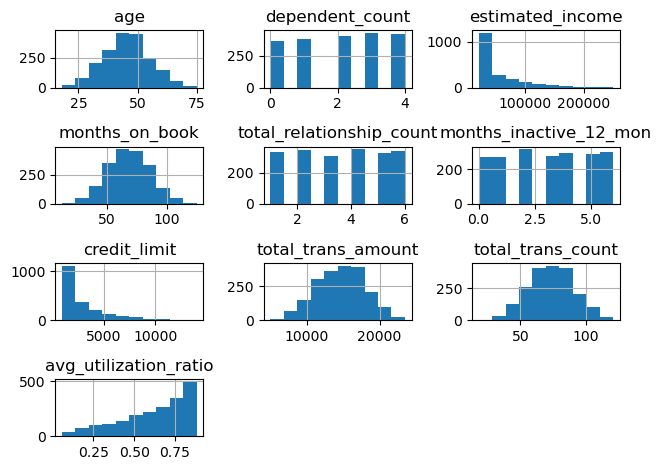

In [7]:
df.hist()
plt.tight_layout()

In [8]:
df.corr(numeric_only=True)

,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
age,1.000000,0.017699,-0.053130,0.822575,-0.025813,-0.002200,-0.044509,-0.006338,-0.011014,0.041761
dependent_count,0.017699,1.000000,0.011132,0.008171,-0.002369,0.038082,0.009911,0.009275,0.002997,-0.005478
estimated_income,-0.053130,0.011132,1.000000,-0.027049,0.023424,-0.014285,0.928238,-0.016673,-0.005511,-0.868741
months_on_book,0.822575,0.008171,-0.027049,1.000000,-0.007970,-0.004717,-0.017815,-0.025042,-0.025889,0.016364
total_relationship_count,-0.025813,-0.002369,0.023424,-0.007970,1.000000,0.012823,0.028453,-0.791497,-0.752144,-0.023328
months_inactive_12_mon,-0.002200,0.038082,-0.014285,-0.004717,0.012823,1.000000,-0.012444,-0.024403,-0.027656,0.016640
credit_limit,-0.044509,0.009911,0.928238,-0.017815,0.028453,-0.012444,1.000000,-0.020080,-0.005968,-0.958927
total_trans_amount,-0.006338,0.009275,-0.016673,-0.025042,-0.791497,-0.024403,-0.020080,1.000000,0.955140,0.009365
total_trans_count,-0.011014,0.002997,-0.005511,-0.025889,-0.752144,-0.027656,-0.005968,0.955140,1.000000,-0.001502
avg_utilization_ratio,0.041761,-0.005478,-0.868741,0.016364,-0.023328,0.016640,-0.958927,0.009365,-0.001502,1.000000


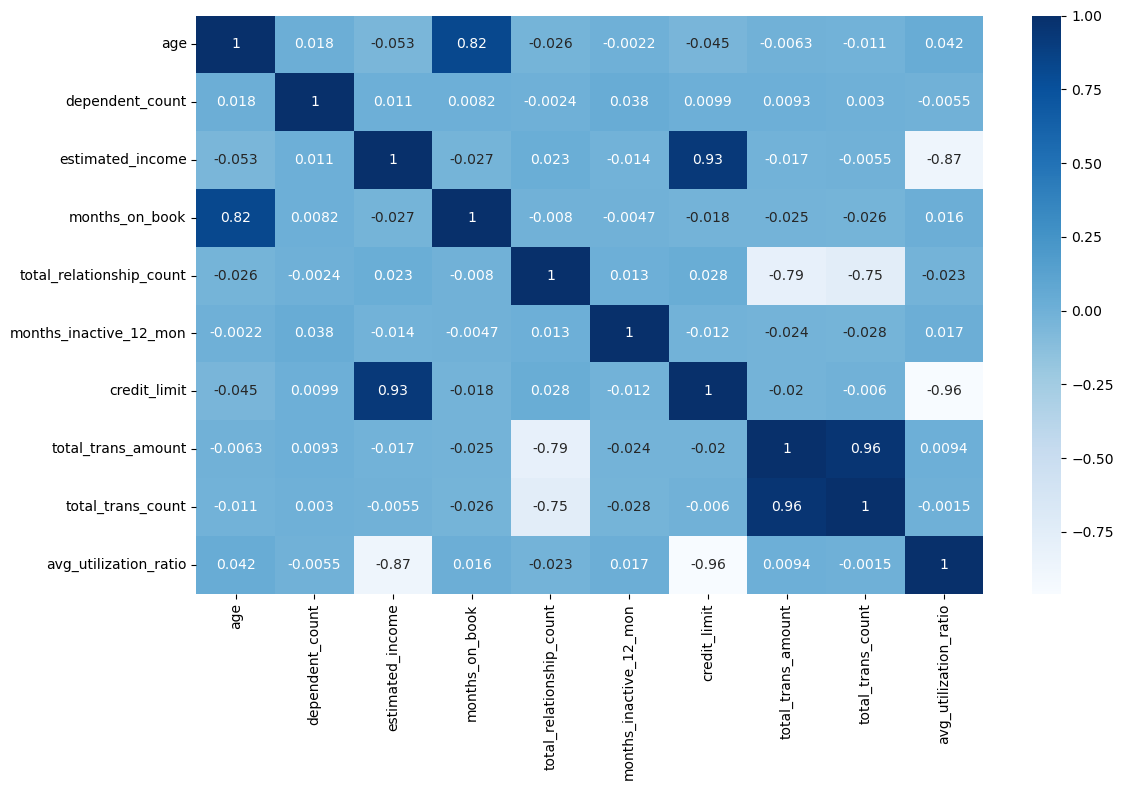

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='Blues', annot=True)
plt.tight_layout()

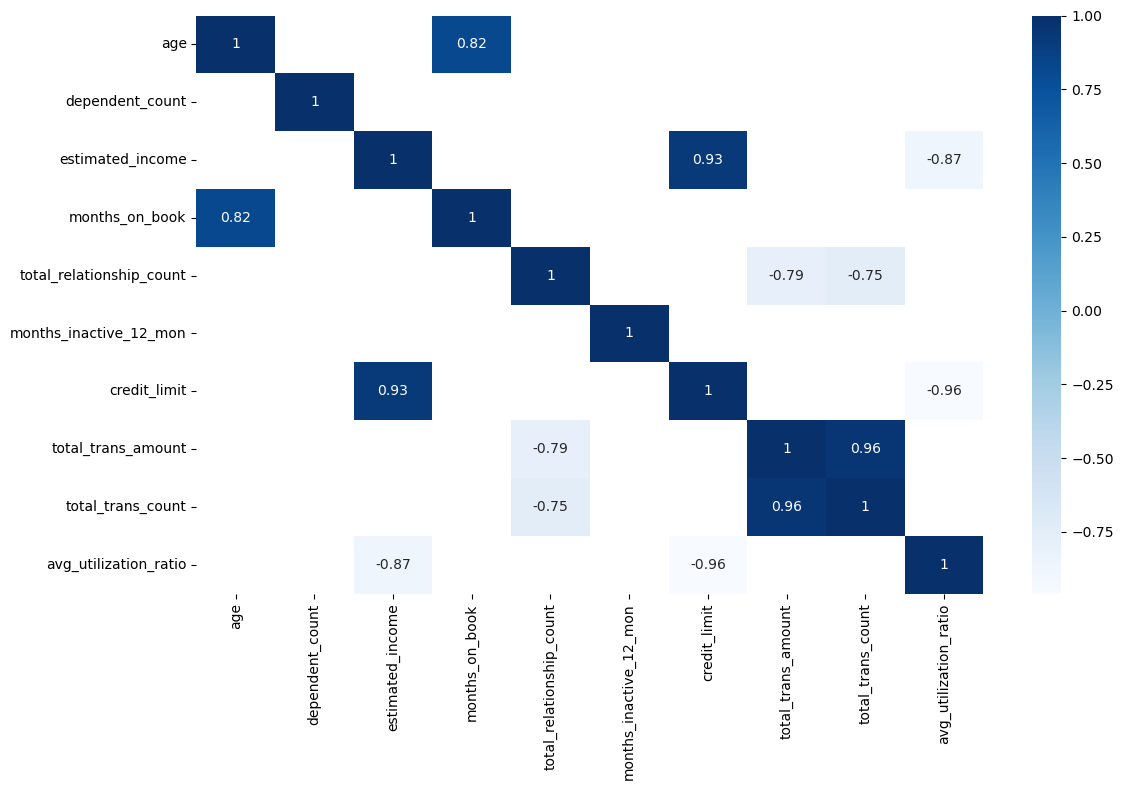

In [10]:
plt.figure(figsize=(12,8))
correlations = df.corr(numeric_only=True)
sns.heatmap(correlations[(correlations>0.30) | (correlations < -0.30)], cmap='Blues', annot=True)
plt.tight_layout()